<a href="https://colab.research.google.com/github/augnoel/boostcourse/blob/main/2%EC%A3%BC%EC%B0%A8%20%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 그래프 한글 출력을 위한 코드
import warnings
warnings.filterwarnings('ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,136 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and dire

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [5]:
print(df.shape)
print(df.info())

(91335, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  

In [6]:
# 데이터 프레임 컬럼명
print('<컬럼 리스트>')
print(df.columns)
print('')
print('<수치형 컬럼 리스트>')
print(df.select_dtypes(exclude='object').columns)
print('')
print('<범주형 컬럼 리스트>')
print(df.select_dtypes(include='object').columns)

<컬럼 리스트>
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

<수치형 컬럼 리스트>
Index(['상가업소번호', '시도코드', '시군구코드', '행정동코드', '법정동코드', '지번코드', '대지구분코드', '지번본번지',
       '지번부번지', '도로명코드', '건물본번지', '건물부번지', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

<범주형 컬럼 리스트>
Index(['상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '대지구분명', '지번주소', '도로명', '건물관리번호', '건물명', '도로명주소', '동정보', '층정보',
       '호정보'],
      dtype='object')


In [7]:
# 수치형 변수 요약
df.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,72079.000000,9.133500e+04,91335.000000,10604.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,17.005092,3.293207e+11,251.200482,7.241135,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,53.451413,1.297391e+11,477.456487,12.426816,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.000000,2.635042e+11,29.000000,1.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,5.000000,4.111743e+11,92.000000,2.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,14.000000,4.311332e+11,257.000000,9.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,1428.000000,5.013049e+11,8795.000000,244.000000,799801.000000,63643.00000,130.909912,38.499659


In [8]:
# 범주형 변수 요약
df.describe(include=object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,91335,1346,91335,91335,91335,91335,91335,91335,86413,86413,...,91280,91335,91335,91335,91335,46453,91335,7406,44044,15551
unique,56910,858,1,1,5,5,34,34,15,15,...,2822,2,53118,16610,54142,17946,54031,556,74,849
top,리원,장례식장,S,의료,S01,병원,S02A01,약국,Q86201,일반 의원,...,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1,1,1
freq,152,97,91335,91335,60774,60774,18964,18964,22555,22555,...,874,91213,198,326,198,131,198,1571,15994,1286


In [9]:
# 데이터 결측치 확인
df_null_cnt = df.isnull().sum().sort_values(ascending = False).reset_index()
df_null_cnt.columns = ['컬럼명', '결측치 수']
df_null_cnt

,컬럼명,결측치 수
0,지점명,89989
1,동정보,83929
2,건물부번지,80731
3,호정보,75784
4,층정보,47291
5,건물명,44882
6,지번부번지,19256
7,표준산업분류코드,4922
8,표준산업분류명,4922
9,시도코드,379


In [11]:
# 결측치 상위 9개 컬럼 제거
df2 = df.copy()
df2 = df2.drop(df_null_cnt['컬럼명'][:9], axis=1)
df2.isnull().sum().sort_values(ascending = False).reset_index()

,index,0
0,시도명,379
1,시도코드,379
2,행정동명,379
3,시군구명,379
4,시군구코드,379
5,법정동코드,55
6,법정동명,55
7,구우편번호,12
8,신우편번호,2
9,건물본번지,0


전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.

In [12]:
# 결측치 처리(제거)
df2 = df2.dropna()
df2.isnull().sum()

,0
상가업소번호,0
상호명,0
상권업종대분류코드,0
상권업종대분류명,0
상권업종중분류코드,0
상권업종중분류명,0
상권업종소분류코드,0
상권업종소분류명,0
시도코드,0
시도명,0


In [13]:
# 상권업종소분류명이 약국인 데이터 출력
df2[df2['상권업종소분류명']=='약국'].head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
15,21006553,상명약국,S,의료,S02,약국/한약방,S02A01,약국,47.0,경상북도,...,경상북도 경주시 성건동 340-4,471303305009,경상북도 경주시 금성로,281,4713010800103400004022515,경상북도 경주시 금성로 281,780943.0,38156.0,129.206670,35.842804
16,21026027,햇살약국,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 안양시 동안구 비산동 1101-2,411733183005,경기도 안양시 동안구 달안로,61,4117310100111010002005070,경기도 안양시 동안구 달안로 61,431719.0,14043.0,126.948953,37.396502
24,21228644,화정하나로,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 고양시 덕양구 화정동 969,412813192098,경기도 고양시 덕양구 화정로,47,4128112300109690000012921,경기도 고양시 덕양구 화정로 47,412737.0,10497.0,126.831406,37.635165


In [14]:
# 전국 시도별 약국 수

# value_counts 사용
print(df2[df2['상권업종소분류명']=='약국']['시도명'].value_counts())

시도명
경기도        4506
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1001
경상북도        915
대구광역시       870
전라북도        862
충청남도        829
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64


In [15]:
# groupby 사용
print(df2[df2['상권업종소분류명']=='약국'].groupby('시도명').size().sort_values(ascending = False))

시도명
경기도        4506
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1001
경상북도        915
대구광역시       870
전라북도        862
충청남도        829
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
dtype: int64


In [16]:
# pivot_table 사용
print(df2[df2['상권업종소분류명']=='약국'].pivot_table(index = '시도명',
                                             aggfunc = 'size')
                                             .sort_values(ascending = False))

시도명
경기도        4506
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1001
경상북도        915
대구광역시       870
전라북도        862
충청남도        829
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
dtype: int64


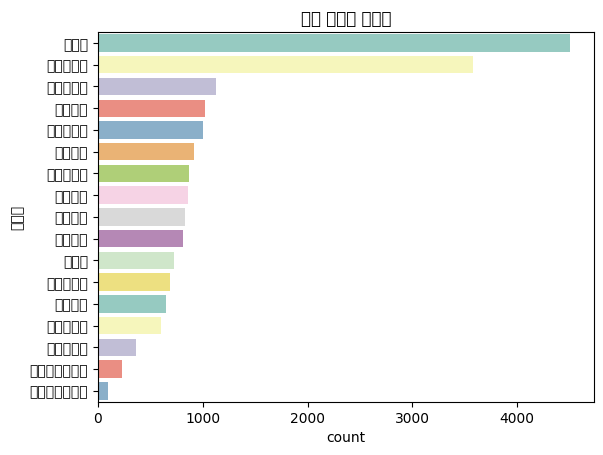

In [45]:
# 전국 시도별 약국 수

# 약국 시도별 빈도수 countplot
df2_parm_1 = df2[df2['상권업종소분류명']=='약국']

sns.countplot(data = df2_parm_1, y = '시도명', palette = 'Set3',
              order = df2_parm_1['시도명'].value_counts().index)
plt.title('약국 시도별 빈도수')
plt.show()

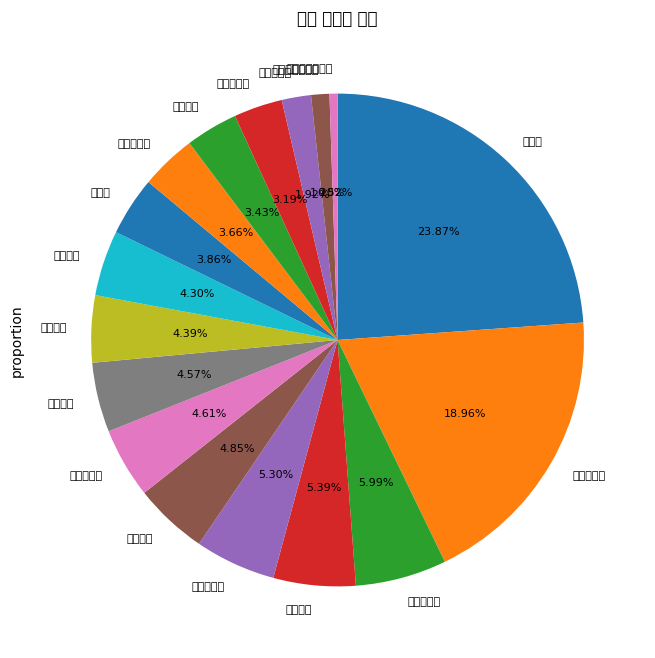

In [20]:
# 약국 시도별 비율 pieplot
n = df2_parm_1['시도명'].value_counts(normalize = True)

n.plot.pie(figsize = (8, 8), autopct = '%.2f%%', startangle = 90,
           counterclock = False, textprops = {'fontsize':8})
plt.title('약국 시도별 비율')
plt.show()

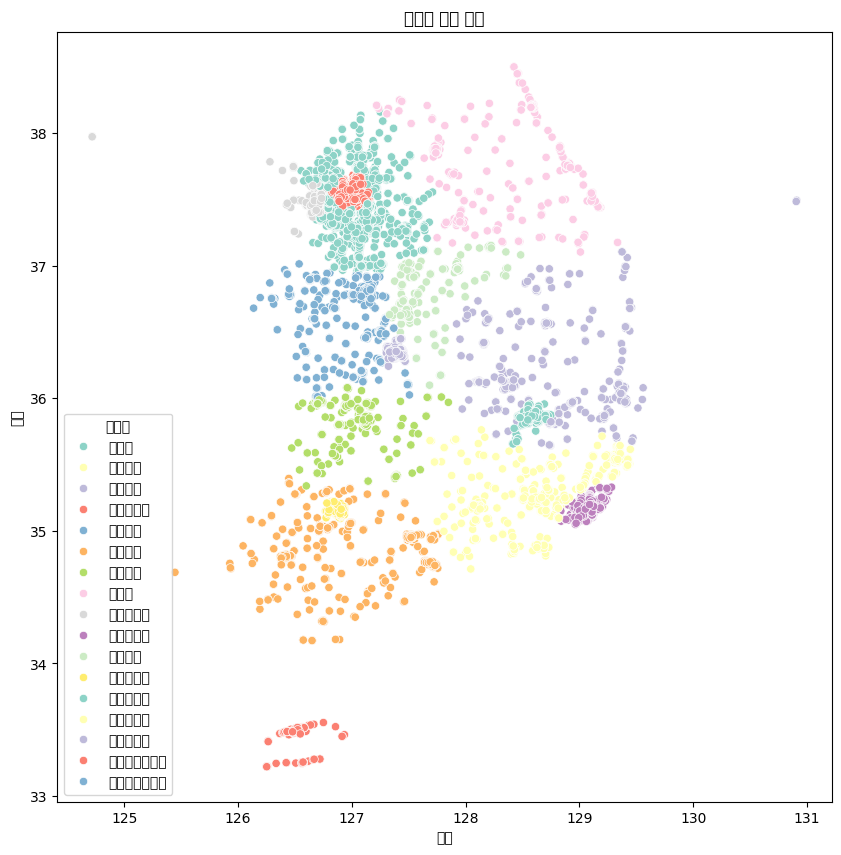

In [22]:
# 시도별 약국 분포 scatterplot
plt.figure(figsize = (10, 10))

sns.scatterplot(data=df2_parm_1, x = '경도', y = '위도', hue = '시도명',
                palette = 'Set3')
plt.title('시도별 약국 분포')
plt.show()

Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

In [24]:
# 상권업중중분류명 범주 확인
df2['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [25]:
# 상권업중소분류명 범주 확인
df2[df2['상권업종중분류명']=='수의업']['상권업종소분류명'].unique()

array(['동물병원', '수의업-종합', '수의업-기타'], dtype=object)

In [26]:
# 전국 시도별 동불병원 수
# 시도별 동물병원 수
## value_counts 사용
print(df2[df2['상권업종소분류명']=='동물병원']['시도명'].value_counts())

시도명
경기도        992
서울특별시      557
인천광역시      192
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64


In [28]:
# 전국 시도별 동물병원, 병원, 약국 수

# 시도별 동물병원, 병원, 약국 수 비교
## 시도별 동물병원 수
df2_animal_1 = df2[df2['상권업종소분류명']=='동물병원']

## 시도별 병원 수
df2_medi_1 = df2[df2['상권업종중분류명']=='병원']

## 시도별 약국 수
df2_parm_1 = df2[df2['상권업종소분류명']=='약국']

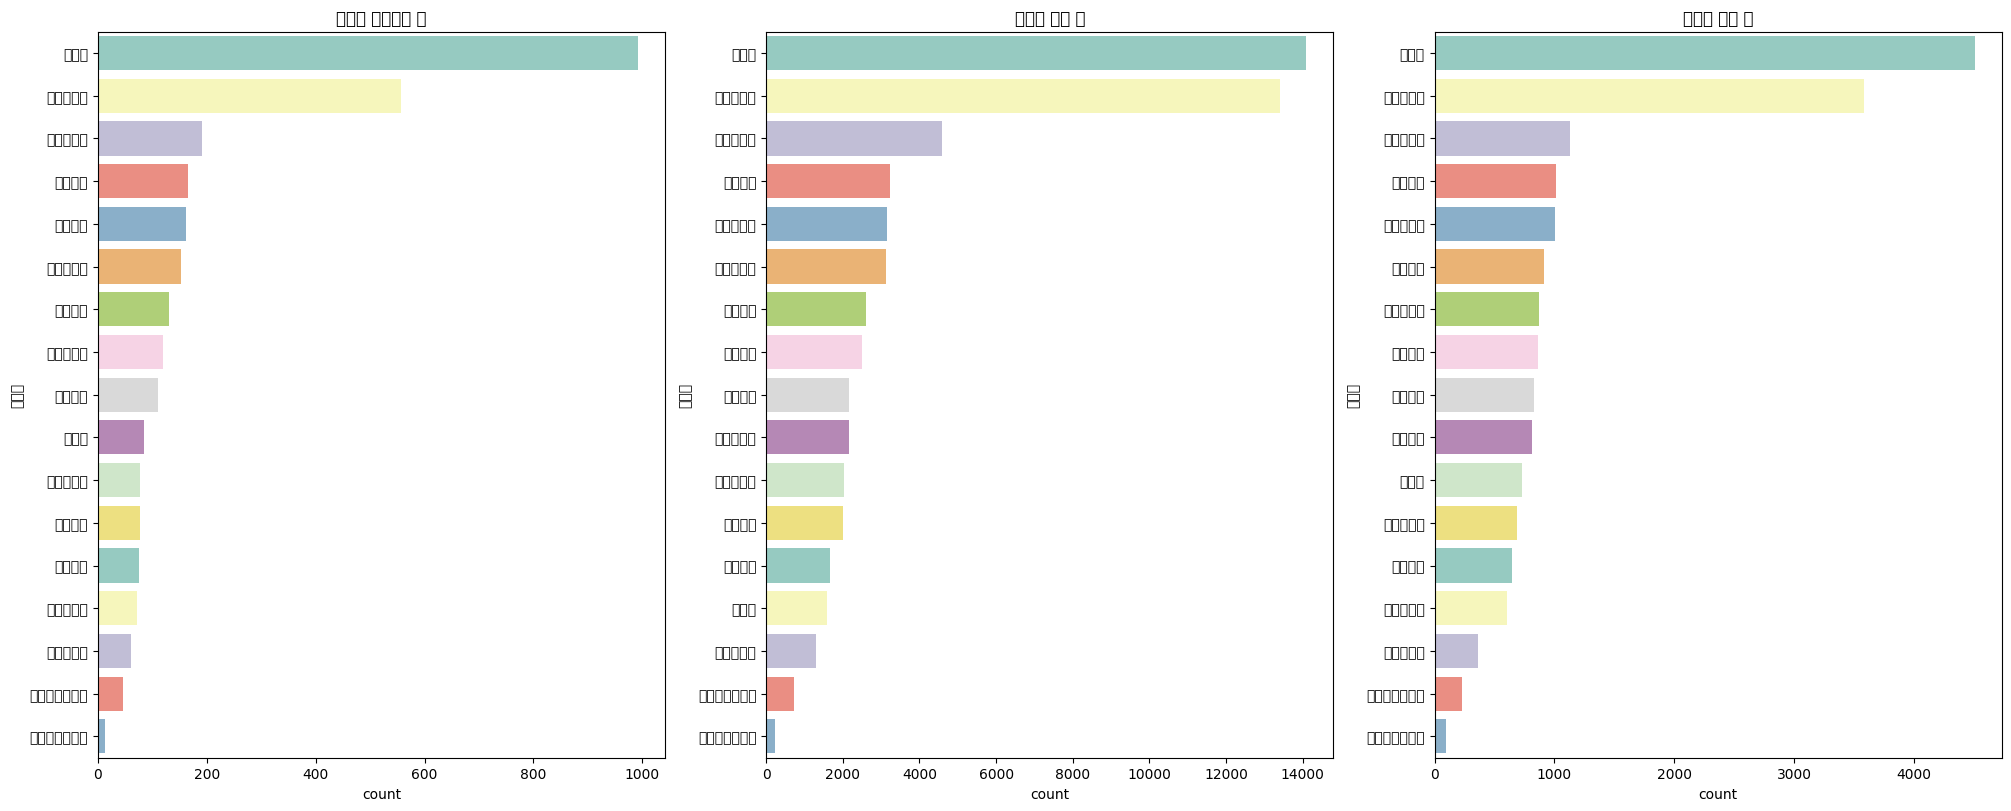

In [30]:
# 시도별 동물병원, 병원, 약국 수 Countplot

fig, ax = plt.subplots(1,3, figsize = (20,8), constrained_layout=True)

sns.countplot(y = '시도명', data = df2_animal_1, palette = 'Set3',
              order = df2_animal_1['시도명'].value_counts().index, ax = ax[0])
ax[0].set_title('시도별 동물병원 수')

sns.countplot(y = '시도명', data = df2_medi_1, palette = 'Set3',
              order = df2_medi_1['시도명'].value_counts().index, ax = ax[1])
ax[1].set_title('시도별 병원 수')

sns.countplot(y = '시도명', data = df2_parm_1, palette = 'Set3',
              order = df2_parm_1['시도명'].value_counts().index, ax = ax[2])
ax[2].set_title('시도별 약국 수')

plt.show()

In [31]:
# 상관계수 및 히트맵

# 시도별 동물병원, 병원, 약국의 수의 데이터 프레임 생성

df_new = pd.DataFrame({'시도명': df2_animal_1['시도명'].value_counts().index.to_list(),
                       '동물병원 수': df2_animal_1['시도명'].value_counts().to_list(),
                       '병원 수': df2_medi_1['시도명'].value_counts().to_list(),
                       '약국 수': df2_parm_1['시도명'].value_counts().to_list()
})
df_new.set_index('시도명', inplace = True)
df_new

,동물병원 수,병원 수,약국 수
시도명,,,
경기도,992,14099,4506
서울특별시,557,13406,3579
인천광역시,192,4601,1130
경상북도,165,3218,1017
경상남도,161,3156,1001
부산광역시,153,3119,915
충청남도,131,2603,870
대구광역시,119,2497,862
전라북도,111,2165,829


<Axes: >

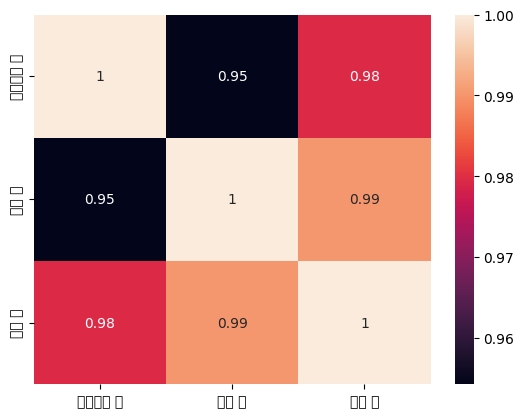

In [32]:
# 시도별 데이터 프레임 컬럼 간 상관계수 heatmap
sns.heatmap(df_new.corr(), annot = True)

In [33]:
# 카이제곱 검정을 위한 함수 정의
from scipy.stats import chi2_contingency

def chi2_test(df, col1, col2):
    contingency_table = df[[col1, col2]].T
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.05:
        print(f'p값({p})이 0.05(유의 수준)보다 작으므로, {col1}과 {col2}는 통계적으로 유의미하게 독립적이지 않습니다.(연관성이 있습니다.)')
    else:
        print(f'p값({p})값이 0.05(유의 수준)보다 크기 때문에, {col1}과 {col2}는 통계적으로 유의미하게 독립적입니다.(연관성이 없습니다.)')

In [34]:
# 동물병원 vs 병원
chi2_test(df_new, '동물병원 수', '병원 수')

# 동물병원 vs 약국
chi2_test(df_new, '동물병원 수', '약국 수')


p값(6.6166447137283956e-24)이 0.05(유의 수준)보다 작으므로, 동물병원 수과 병원 수는 통계적으로 유의미하게 독립적이지 않습니다.(연관성이 있습니다.)
p값(1.4403593758567123e-21)이 0.05(유의 수준)보다 작으므로, 동물병원 수과 약국 수는 통계적으로 유의미하게 독립적이지 않습니다.(연관성이 있습니다.)


Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

In [35]:
# 상권업중소분류명 내 '피부'나 '성형'을 포함한 분류명 (서울특별시)
df2[(df2['상권업종소분류명'].str.contains('피부|성형')) & (df2['시도명'] == '서울특별시')].head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강남구 신사동 592-4,116803121022,서울특별시 강남구 논현로,826,1168010700105920004010990,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강동구 성내동 9-5,117402000008,서울특별시 강동구 천호대로,1032,1174010800100090005004868,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
44,20912401,아미가성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 서초구 방배동 902-1,116504163257,서울특별시 서초구 방배로20길,4,1165010100109020001015305,서울특별시 서초구 방배로20길 4,137060.0,6664.0,126.995334,37.485498
94,21859520,새롬성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 영등포구 영등포동4가 425-37,115603000028,서울특별시 영등포구 경인로,835,1156010500104250037035858,서울특별시 영등포구 경인로 835,150034.0,7305.0,126.905647,37.516310
164,22838864,김종서성형,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강남구 신사동 599,116803121022,서울특별시 강남구 논현로,842,1168010700105990004010396,서울특별시 강남구 논현로 842,135893.0,6025.0,127.028712,37.524027


In [36]:
# 서울특별시 시군구별 피부과, 성형외과 수
df2_1 = df2[(df2['상권업종소분류명'].str.contains('피부|성형')) & (df2['시도명'] == '서울특별시')]['시군구명'].value_counts()

# 서울특별시 시군구별 병원 수
df2_2 = df2[(df2['상권업종중분류명']=='병원') & (df2['시도명'] == '서울특별시')]['시군구명'].value_counts()

df2_new = pd.concat([df2_1, df2_2], axis=1)
df2_new.columns = ['피부과/성형외과 수', '병원 수']
df2_new

,피부과/성형외과 수,병원 수
시군구명,,
강남구,603,2550
서초구,200,1196
송파구,48,748
마포구,40,456
영등포구,39,516
강서구,38,579
광진구,37,600
강동구,37,494
중구,31,423


In [37]:
# 서울특별시 시군구별 피부과, 성형외과 비율
result = round(df2_new['피부과/성형외과 수']/df2_new['병원 수'],2).sort_values(ascending = False)
print(result)

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
광진구     0.06
은평구     0.06
성북구     0.06
송파구     0.06
구로구     0.06
강북구     0.05
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
dtype: float64


Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

In [38]:
# 상권업종중분류명을 범주 확인
df2[df2['상권업종중분류명']=='병원']['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '정형/성형외과', '소아과', '이비인후과의원',
       '노인/치매병원', '한의원', '치과의원', '일반병원', '안과의원', '한방병원', '종합병원', '치과병원',
       '피부과', '비뇨기과'], dtype=object)

In [39]:
# 상권업종소분류명 '노인/치매병원' 포함 데이터 확인
df2_filtered = df2[df2['상권업종소분류명']=='노인/치매병원']
df2_filtered.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
21,21128898,다사랑요양병원,S,의료,S01,병원,S01B17,노인/치매병원,26.0,부산광역시,...,부산광역시 북구 만덕동 136-2,263203132005,부산광역시 북구 덕천로,339,2632010300101360002000001,부산광역시 북구 덕천로 339,616110.0,46610.0,129.040773,35.209154
62,21511155,노경회,S,의료,S01,병원,S01B17,노인/치매병원,46.0,전라남도,...,전라남도 광양시 진월면 마룡리 1024-1,462304655370,전라남도 광양시 진월면 용소길,7,4623035023110240001000001,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,127.746981,34.986585
69,21406385,일산카네이션너싱홈,S,의료,S01,병원,S01B17,노인/치매병원,41.0,경기도,...,경기도 고양시 일산동구 중산동 1561-1,412853193032,경기도 고양시 일산동구 중산로,241,4128510200115610001011448,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,126.780122,37.693689
79,21403242,은성복지회,S,의료,S01,병원,S01B17,노인/치매병원,46.0,전라남도,...,전라남도 순천시 석현동 636-1,461504649964,전라남도 순천시 조비길,298,4615010800200220000080503,전라남도 순천시 조비길 298,540950.0,57922.0,127.460606,34.991014
107,21722929,하은실버홈,S,의료,S01,병원,S01B17,노인/치매병원,47.0,경상북도,...,경상북도 상주시 낙동면 낙동리 788,472503311045,경상북도 상주시 낙동면 영남제일로,125,4725033022107880000027997,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,128.295524,36.365132


In [40]:
# 라이브러리 불러오기 및 지도 설정
import folium

map = folium.Map(location=[df2_filtered["위도"].mean(),df2_filtered["경도"].mean()], zoom_start=7)

In [41]:
# 노인/요양병원 위치 표시

## 시도명별 그룹핑
## : 위치 기반으로 시도별 그룹 생성, 그룹별로 다른 아이콘과 색상으로 표시
region_groups = {
    # 1그룹
    '경기도': 1, '서울특별시': 1, '인천광역시': 1,
    # 2그룹
    '경상북도': 2, '경상남도': 2, '부산광역시': 2, '울산광역시': 2, '대구광역시': 2,
    # 3그룹
    '충청남도': 3, '충청북도': 3, '대전광역시': 3, '세종특별자치시': 3,
    # 4그룹
    '전라북도': 4, '전라남도': 4, '광주광역시': 4,
    # 5그룹
    '강원도': 5,
    # 6그룹
    '제주특별자치도': 6
}

## 그룹별 아이콘 색상과 모양 설정
region_icons = {
    # 경기도, 서울특별시, 인천광역시
    1: {'color': 'green', 'icon': 'star'},
    # 경상북도, 경상남도, 부산광역시, 울산광역시, 대구광역시
    2: {'color': 'blue', 'icon': 'heart'},
    # 충청남도, 충청북도, 대전광역시, 세종특별자치시
    3: {'color': 'red', 'icon': 'cloud'},
    # 전라북도, 전라남도, 광주광역시
    4: {'color': 'purple', 'icon': 'info-sign'},
    # 강원도
    5: {'color': 'orange', 'icon': 'flag'},
    # 제주특별자치도
    6: {'color': 'darkred', 'icon': 'leaf'}

}


## 마커 표시
for n in df2_filtered.index:

    # 클릭 문구 설정
    name = df2_filtered.loc[n, "상호명"]
    address = df2_filtered.loc[n, "도로명주소"]
    popup = f"{name}-{address}"

    # 시도명에 따른 그룹 설정
    region = region_groups[df2_filtered.loc[n, "시도명"]]

    # 아이콘 설정 (색, 모양)
    icon_color = region_icons[region]['color']
    icon_shape = region_icons[region]['icon']

    # 마커 위치 설정
    location = [df2_filtered.loc[n, "위도"], df2_filtered.loc[n, "경도"]]

    # 지도 마커 표시
    folium.Marker(
        location = location,    # 위치 설정
        popup = popup,          # 클릭 문구 설정
        icon=folium.Icon(color=icon_color, icon=icon_shape)
                                # 아이콘 색상, 모양 설정
    ).add_to(map)
map